**IMPLEMENTACIÓN DE ALGORITMOS DE RECOMENDACIÓN PARA LA AGREGACIÓN DE DEMANDA EN COMPRAS PÚBLICAS**



Los Datos fueron obtenidos de Datos Abiertos del SECOP https://www.colombiacompra.gov.co/transparencia/conjuntos-de-datos-abiertos


La descarga del Conjunto de Datos "Procesos de Contratación" (https://www.datos.gov.co/Gastos-Gubernamentales/SECOP-II-Procesos-de-Contrataci-n/p6dx-8zbt/about_data) se realizó el 31 de enero de 2024.



**PARTE I**

**REGLAS DE ASOCIACIÓN**

In [ ]:
# Importamos librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import numpy as np

In [ ]:
# Importamos librerías para Reglas de Asociación

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from google.colab import files

In [ ]:
# Importamos Base de Datos

df=pd.read_excel('/content/Base_RA.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Importamos Base de Nombre de Clases

df_cod=pd.read_excel('/content/Código_Estándar_Producto.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Ordenamos de menor a mayor. Por regla de negocio, entidades tenderían a comprar clases cercanas.

df_or=df.sort_values(df.columns[0],ascending=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Ordenamos de menor a mayor. Por regla de negocio, entidades tenderían a comprar clases cercanas.

df_or=df.sort_values(df.columns[0],ascending=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_or

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Categoría 1,Categoría 2
6278,10101502,10121802
10071,10101511,10122101
2559,10101511,10122101
274,10101511,10122101
751,10101511,10101601
...,...,...
8955,95131605,72103302
1879,95131702,14111507
1725,95131702,49121503
4352,95131702,95131701


In [ ]:
df_cod

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Código Producto,Nombre Acotado
0,10101501,Gatos
1,10101502,Perros
2,10101504,Visón
3,10101505,Ratas
4,10101506,Caballos
...,...,...
49017,95141803,Unidad de contenedor
49018,95141901,Unidad médica
49019,95141902,Unidad de laboratorio
49020,95141903,Unidad odontológica


In [ ]:
# Validamos base de Código Estándar con clase

db=df_or

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Creamos función para particionar db en 56 partes de acuerdo con los dígitos de las clases en el Código Estándar

# Definimos la lista de prefijos para la partición:
prefixes = [
    '10', '11', '12', '13', '14', '15', '20', '21', '22', '23', '24', '25', '26', '27',
    '30', '31', '32', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
    '50', '51', '52', '53', '54', '55', '56', '60', '70', '71', '72', '73', '76', '77',
    '78', '80', '81', '82', '83', '84', '85', '86', '90', '91', '92', '93', '94', '95'
]

# Inicializamos el diccionario para mantener particiones

partitions = {f'db_{i}': pd.DataFrame() for i in range(1, 57)}

# Iteramos sobre el df_or para asignar cada fila a la partición adecuada
for index, row in db.iterrows():
    # Obtenemos primeros dos dígitos de columna 1
    prefix = str(row['Categoría 1'])[:2]
    # Encontramos particíon respectiva
    for i, p in enumerate(prefixes, start=1):
        if prefix == p:
            partitions[f'db_{i}'] = pd.concat([partitions[f'db_{i}'], row.to_frame().T], ignore_index=True)
            break

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Validamos una particióN específica

# Accedemos la partición 80
partition_key = 'db_80'
for p in prefixes:
    if p == '80':
        index = prefixes.index(p) + 1
        partition_key = f'db_{index}'
        break

# Imprimimos
if partition_key in partitions:
    print(partitions[partition_key])
else:
    print(f"Partition {partition_key} does not exist.")

     Categoría 1  Categoría 2
0       80101501     85101501
1       80101504     80101505
2       80101504     77101802
3       80101504     80101505
4       80101504     81111801
..           ...          ...
591     80161801     82121701
592     80161801     44101503
593     80161801     43211711
594     80161801     82121701
595     80161801     80161501

[596 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Reemplazamos código por nombre de producto

# Hacemos mapeo desde 'Código Clase' A 'Nombre Producto'

code_to_name_map = df_cod.set_index('Código Producto')['Nombre Acotado'].to_dict()

# Iteramos sobre 'Categoría i' y reemplazamos valores
for i in range(1, 44):
    categoria_col = f'Categoría {i}'
    if categoria_col in df_or.columns:
        df_or[categoria_col] = df_or[categoria_col].map(code_to_name_map).fillna(df_or[categoria_col])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Ajustamos nombres de Producto en Diccionario

# Creamos Mapeo
code_to_name_map = df_cod.set_index('Código Producto')['Nombre Acotado'].to_dict()

# Iteramos sobre cada partición del diccionario
for partition_key in partitions:
    # Accedemos cada partición
    partition_df = partitions[partition_key]

    # Iteramos en cada "Categoría i"
    for i in range(1, 44):
        categoria_col = f'Categoría {i}'

        # Validamos si la columna existe en cada partición.
        if categoria_col in partition_df.columns:
            # Aplicamos mapeo y llenamos con nombres
            partition_df[categoria_col] = partition_df[categoria_col].map(code_to_name_map).fillna(partition_df[categoria_col])

    # Actualizamos diccionario
    partitions[partition_key] = partition_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Validamos una partición específica

# Accedemos la partición 80
partition_key = 'db_80'
for p in prefixes:
    if p == '80':
        index = prefixes.index(p) + 1
        partition_key = f'db_{index}'
        break

# Imprimimos
if partition_key in partitions:
    print(partitions[partition_key])
else:
    print(f"Partition {partition_key} does not exist.")

                                           Categoría 1  \
0    Servicios de asesoramiento sobre la puesta en ...   
1    Servicios de asesoramiento sobre planificación...   
2    Servicios de asesoramiento sobre planificación...   
3    Servicios de asesoramiento sobre planificación...   
4    Servicios de asesoramiento sobre planificación...   
..                                                 ...   
591   Servicio de alquiler o leasing de fotocopiadoras   
592   Servicio de alquiler o leasing de fotocopiadoras   
593   Servicio de alquiler o leasing de fotocopiadoras   
594   Servicio de alquiler o leasing de fotocopiadoras   
595   Servicio de alquiler o leasing de fotocopiadoras   

                                           Categoría 2  
0    Servicios hospitalarios de emergencia o quirúr...  
1    Desarrollo de políticas u objetivos empresaria...  
2         Servicios de auditoria ambiental de empresas  
3    Desarrollo de políticas u objetivos empresaria...  
4      Seguridad d

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Aplicamos Algoritmo Apriori sobre cada partición del Diccionario

# Creamos conteo para número de reglas en cada llave

rules_count = {}

for partition_name, df_partition in partitions.items():
    df_partition = df_partition.reset_index(drop=True)

    # Validamos que columnas sean strings

    df_partition['Categoría 1'] = df_partition['Categoría 1'].astype(str)
    df_partition['Categoría 2'] = df_partition['Categoría 2'].astype(str)

    # Extraemos categorías unicas de "Categoría 1" y "Categoría 2"

    unique_categories = np.union1d(df_partition['Categoría 1'].unique(), df_partition['Categoría 2'].unique())

    # Inicializamos matrices de incidencia binaria con 0s

    binary_incidence_matrix = pd.DataFrame(0, index=np.arange(len(df_partition)), columns=unique_categories)

    # Llenamos matrices según aparición en cada categoría

    for idx, row in df_partition.iterrows():
        if row['Categoría 1'] in unique_categories:
            binary_incidence_matrix.at[idx, row['Categoría 1']] = 1
        if 'Categoría 2' in row and row['Categoría 2'] in unique_categories:
            binary_incidence_matrix.at[idx, row['Categoría 2']] = 1

    # Convertimos matriz de incidencia binaria en booleana

    binary_incidence_matrix = binary_incidence_matrix.astype(bool)

    # Aplicamos Algoritmo Apriori para obtener itemsets

    itemsets = apriori(binary_incidence_matrix, min_support=0.01, use_colnames=True)

    # Derivamos reglas de asociación

    rules = association_rules(itemsets, metric='confidence', min_threshold=0.3)

    # Imprimimos reglas organizadas por 'lift' para partición actual

    print(f"Association Rules for {partition_name}:")
    print(rules.sort_values(by=['lift'], ascending=False)
              .drop(columns=['antecedent support', 'consequent support', 'conviction'])
              .head(6)
              .to_string(index=False, float_format="{:.2f}".format, justify='left', max_colwidth=40))
    print("\n" + "-" * 80 + "\n")

    # Get the number of rules for the current partition

    num_rules = len(rules)

    # Adicionamos conteo de reglas por llave

    rules_count[partition_name] = num_rules

# Imprimimos conteo de número de reglas por cada partición

print("Número de Reglas por Partición:")
for partition_name, count in rules_count.items():
    print(f"{partition_name}: {count} rules")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Association Rules for db_1:
antecedents                      consequents                       support  confidence  lift  leverage  zhangs_metric
(Semillas o plántulas de canela)           (Semillas de ajonjolí) 0.01     1.00        40.80 0.01      0.99          
          (Semillas de ajonjolí) (Semillas o plántulas de canela) 0.01     0.60        40.80 0.01      1.00          
                  (Insecticidas)               (Mata – roedores ) 0.02     0.57        29.14 0.02      1.00          
              (Mata – roedores )                   (Insecticidas) 0.02     1.00        29.14 0.02      0.98          
                  (Tilapia viva)  (Alimento granulado para peces) 0.02     0.57        16.65 0.02      0.97          
 (Alimento granulado para peces)                   (Tilapia viva) 0.02     0.57        16.65 0.02      0.97          

--------------------------------------------------------------------------------

Association Rules for db_2:
antecedents                        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


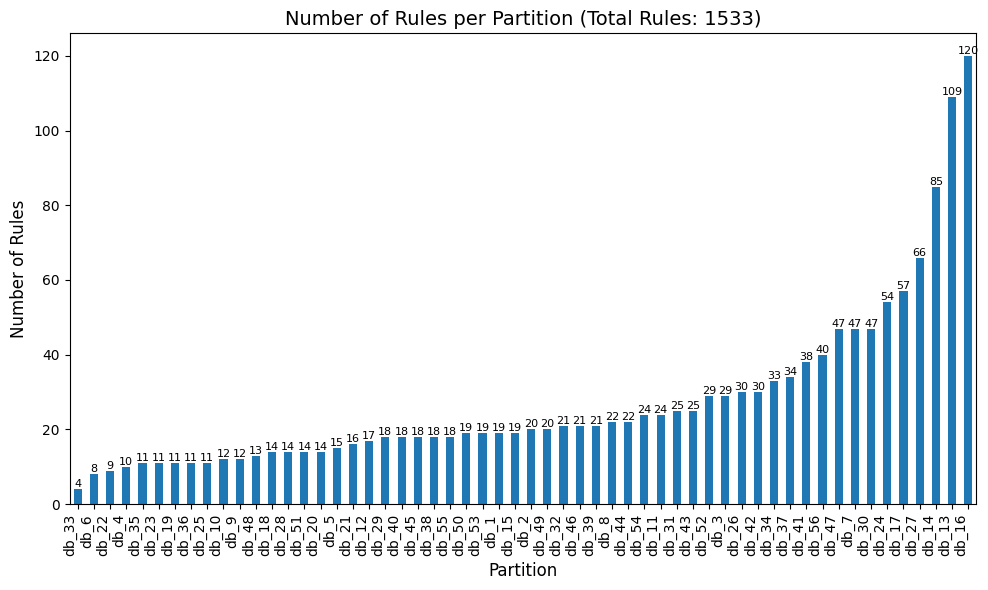

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convertimos rules_count en Series

rules_series = pd.Series(rules_count)

# Calculamos número total de reglas

total_rules = sum(rules_series)

# Creamos Gráfico

fig, ax = plt.subplots(figsize=(10, 6))
bars = rules_series.sort_values(ascending=True).plot(kind='bar', ax=ax)


bar_heights = [bar.get_height() for bar in ax.containers[0]]

# Adicionamos número de reglas en cada barra

for rect, height in zip(ax.containers[0], bar_heights):
    ax.text(rect.get_x() + rect.get_width() / 2, height, str(int(height)), ha='center', va='bottom', fontsize=8)

# Incorporamos en título número total de reglas

ax.set_title(f'Number of Rules per Partition (Total Rules: {total_rules})', fontsize=14)
ax.set_xlabel('Partition', fontsize=12)
ax.set_ylabel('Number of Rules', fontsize=12)

# Rotamos ejes para facilidad de lectura

plt.xticks(rotation=90, ha='right', fontsize=10)

# Mostramos gráfico

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

def compute_lift_stats(partitions):
    lift_values = []

    for partition_name, df_partition in partitions.items():
        df_partition = df_partition.reset_index(drop=True)

        # Validamos que columnas sean strings

        df_partition['Categoría 1'] = df_partition['Categoría 1'].astype(str)
        df_partition['Categoría 2'] = df_partition['Categoría 2'].astype(str)

        # Extraemos catgorías unicas de "Categoría 1" y "Categoría 2"

        unique_categories = np.union1d(df_partition['Categoría 1'].unique(), df_partition['Categoría 2'].unique())

        # Inicializamos matrices de incidencia binaria con 0s

        binary_incidence_matrix = pd.DataFrame(0, index=np.arange(len(df_partition)), columns=unique_categories)

        # Llenamos matrices según aparición en cada categoría

        for idx, row in df_partition.iterrows():
            if row['Categoría 1'] in unique_categories:
                binary_incidence_matrix.at[idx, row['Categoría 1']] = 1
            if 'Categoría 2' in row and row['Categoría 2'] in unique_categories:
                binary_incidence_matrix.at[idx, row['Categoría 2']] = 1

        # Convertimos matriz de incidencia binaria en booleana

        binary_incidence_matrix = binary_incidence_matrix.astype(bool)

        # Aplicamos Algoritmo Apriori para obtener itemsets

        itemsets = apriori(binary_incidence_matrix, min_support=0.01, use_colnames=True)

        # Derivamos reglas de asociación

        rules = association_rules(itemsets, metric='confidence', min_threshold=0.3)

        lift_values.extend(rules['lift'].tolist())

    lift_stats = {
        'Count': len(lift_values),
        'Mean': np.mean(lift_values),
        'Median': np.median(lift_values),
        'Min': np.min(lift_values),
        'Max': np.max(lift_values),
        'Standard Deviation': np.std(lift_values)
    }

    return lift_stats

# Sacamos estadísticas descriptivas

lift_statistics = compute_lift_stats(partitions)

# Imprimimos Estadísticas Descriptivas

print("Descriptive Statistics for Lift across All Partitions:")
for stat, value in lift_statistics.items():
    print(f"{stat}: {value:.2f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Descriptive Statistics for Lift across All Partitions:
Count: 1533.00
Mean: 21.49
Median: 12.29
Min: 0.39
Max: 98.00
Standard Deviation: 21.76


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


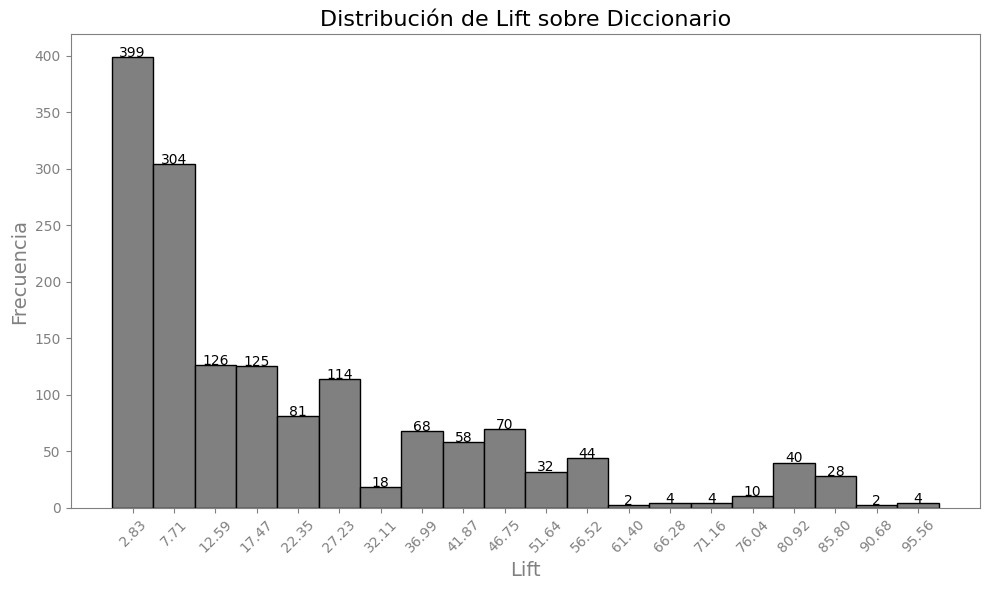

In [ ]:
# Inicializamos lista vacía para almacenar los resultados de la métrica 'Lift'

all_lifts = []

# Iteramos sobre cada partición
for partition_name, df_partition in partitions.items():
    df_partition = df_partition.reset_index(drop=True)
    df_partition['Categoría 1'] = df_partition['Categoría 1'].astype(str)
    df_partition['Categoría 2'] = df_partition['Categoría 2'].astype(str)

    unique_categories = np.union1d(df_partition['Categoría 1'].unique(), df_partition['Categoría 2'].unique())
    binary_incidence_matrix = pd.DataFrame(0, index=np.arange(len(df_partition)), columns=unique_categories)

    for idx, row in df_partition.iterrows():
        if row['Categoría 1'] in unique_categories:
            binary_incidence_matrix.at[idx, row['Categoría 1']] = 1
        if 'Categoría 2' in row and row['Categoría 2'] in unique_categories:
            binary_incidence_matrix.at[idx, row['Categoría 2']] = 1

    binary_incidence_matrix = binary_incidence_matrix.astype(bool)
    itemsets = apriori(binary_incidence_matrix, min_support=0.01, use_colnames=True)
    rules = association_rules(itemsets, metric='confidence', min_threshold=0.3)

    # Adicionamos los valores de 'lift' desde partición hacia la lista general
    all_lifts.extend(rules['lift'].tolist())

# Graficamos la distribución de valores 'lift'
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(all_lifts, bins=20, edgecolor='black', color='gray')

# Incorporamos etiquetas en eje 'x'
bin_centers = (bins[:-1] + bins[1:])/2
plt.xticks(bin_centers, [f"{bin_centers[i]:.2f}" for i in range(len(bin_centers))], rotation=45)
plt.title('Distribución de Lift sobre Diccionario', fontsize=16)
plt.xlabel('Lift', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Establecemos el color de las etiquetas y los ejes en escala de grises
plt.gca().set_facecolor('white')
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['top'].set_color('gray')
plt.gca().spines['right'].set_color('gray')
plt.gca().spines['left'].set_color('gray')
plt.gca().xaxis.label.set_color('gray')
plt.gca().yaxis.label.set_color('gray')
plt.gca().tick_params(axis='x', colors='gray')
plt.gca().tick_params(axis='y', colors='gray')

# Agregamos etiquetas en la parte superior de cada barra
for i, v in enumerate(n):
    plt.text(bin_centers[i], v + 0.1, str(int(v)), color='black', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

**PARTE II**

**FILTROS COLABORATIVOS**

In [ ]:
# Importamos librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import numpy as np
import statistics

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357240 sha256=42299b9fa1a0d892f3f50c3ae5a21f68f1661c7254694ceaff1620b841a0fa50
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset, Reader, KNNBasic, accuracy
from surprise.model_selection import train_test_split

In [ ]:
# Importamos módulos y métodos faltantes

from collections import defaultdict
import heapq

In [ ]:
# Importamos Base de Datos

df_fc=pd.read_excel('/content/Base_FC.xlsx')

In [ ]:
df_fc

,user id,item id
0,899999034,60105300
1,899999034,27112000
2,830025406,80141600
3,892280021,80101500
4,891480030,95141800
...,...,...
307454,800012635,93131600
307455,800026368,85151600
307456,800165874,81112100
307457,800027292,47121700


In [ ]:
import pandas as pd

# Calculamos 'rating'

df_fc['rating'] = df_fc.groupby(['user id', 'item id'])['item id'].transform('count')

# Eliminamos duplicados

df_fc = df_fc.drop_duplicates().reset_index(drop=True)

# Ordenamos columnas

df_fc = df_fc[['item id', 'user id', 'rating']]

print(df_fc)

        item id    user id  rating
0      60105300  899999034      84
1      27112000  899999034      26
2      80141600  830025406       2
3      80101500  892280021      43
4      95141800  891480030       7
...         ...        ...     ...
89781  11141700  800020045       1
89782  80111600  890506128       1
89783  73131700  800099199       1
89784  85151600  800026368       1
89785  47121700  800027292       1

[89786 rows x 3 columns]


In [ ]:
df_fc.describe()

,item id,rating
count,8.978600e+04,89786.000000
mean,5.767577e+07,3.424353
std,2.351089e+07,20.584112
min,1.010150e+07,1.000000
25%,4.220180e+07,1.000000
50%,5.312180e+07,1.000000
75%,8.012170e+07,3.000000
max,9.514190e+07,4332.000000


In [ ]:
# Eliminamos registros en los que el conteo o 'rating' esté entre 2 y 5

df_fc = df_fc[(df_fc['rating'] >= 2) & (df_fc['rating'] <= 5)]

In [ ]:
df_fc

,item id,user id,rating
2,80141600,830025406,2
5,80131800,901038962,4
9,48101600,800022618,3
11,60131400,899999034,2
13,81111800,899999124,2
...,...,...,...
89508,93131600,800100520,2
89521,81112200,830065741,2
89533,77101700,800020045,2
89557,72102900,800012873,2


In [ ]:
df_fc.describe()

,item id,rating
count,3.192500e+04,31925.000000
mean,5.955700e+07,2.852968
std,2.360446e+07,1.015014
min,1.010150e+07,2.000000
25%,4.321190e+07,2.000000
50%,5.612150e+07,3.000000
75%,8.110150e+07,4.000000
max,9.514190e+07,5.000000


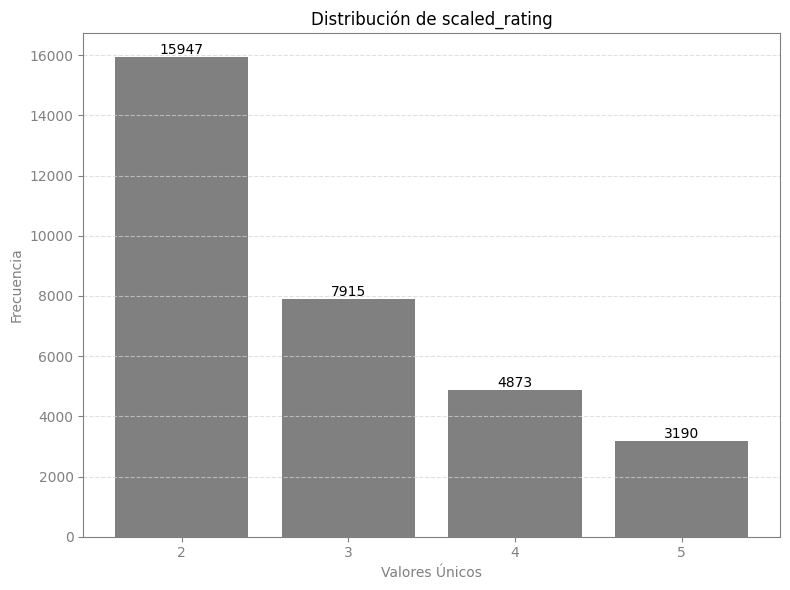

In [ ]:
# Graficamos distribución de rating

plt.figure(figsize=(8, 6))
value_counts = df_fc['rating'].value_counts().sort_index()
bars = plt.bar(value_counts.index, value_counts.values, color='gray')

# Añadimos etiquetas

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', color='black')

plt.title('Distribución de scaled_rating')
plt.xlabel('Valores Únicos')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='lightgray')
plt.xticks(value_counts.index)

# Establecemos el color de las etiquetas y los ejes en escala de grises

plt.gca().set_facecolor('white')
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['top'].set_color('gray')
plt.gca().spines['right'].set_color('gray')
plt.gca().spines['left'].set_color('gray')
plt.gca().xaxis.label.set_color('gray')
plt.gca().yaxis.label.set_color('gray')
plt.gca().tick_params(axis='x', colors='gray')
plt.gca().tick_params(axis='y', colors='gray')

plt.tight_layout()
plt.show()

In [ ]:
# Ordenamos segun item id de forma ascendente

db_fc = df_fc.sort_values(by='item id', ascending=True)

In [ ]:
db_fc

,item id,user id,rating
19388,10101500,800014434,2
36889,10101500,890801052,5
27300,10101500,891801240,2
62575,10101500,890001780,2
76163,10101500,8909801366,2
...,...,...,...
52064,95141800,890399011,2
39688,95141800,900678508,4
31156,95141800,890480184,3
34762,95141900,899999034,5


In [ ]:
# Creamos función para particionar db en 56 partes de acuerdo con los dígitos de las clases en el Código Estándar
# Definimos la lista de prefijos para la partición:

prefixes = [
    '10', '11', '12', '13', '14', '15', '20', '21', '22', '23', '24', '25', '26', '27', '30', '31', '32', '39',
    '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '60',
    '70', '71', '72', '73', '76', '77', '78', '80', '81', '82', '83', '84', '85', '86', '90', '91', '92', '93',
    '94', '95'
]

# Inicializamos el diccionario para mantener particiones

partitions = {f'db_fc_{i}': pd.DataFrame() for i in range(1, 57)}

# Iteramos sobre el df_or para asignar cada fila a la partición adecuada

for index, row in db_fc.iterrows():
    # Obtenemos primeros dos dígitos de columna 1

    prefix = str(row['item id'])[:2]

    # Encontramos partición respectiva

    for i, p in enumerate(prefixes, start=1):
        if prefix == p:
            partitions[f'db_fc_{i}'] = pd.concat([partitions[f'db_fc_{i}'], row.to_frame().T], ignore_index=True)
            break

In [ ]:
# Definimos función para determinar mejores predicciones

def get_top_n(predictions, n=8):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
# Definición de precisión

def precision_at_k(top_n, k=8):
    precisions = []
    for uid in top_n:
        hit = sum((rating[1] >= 2) for rating in top_n[uid][:k])
        precisions.append(hit / float(k))
    return sum(precisions) / len(precisions) if precisions else 0

In [ ]:
# Función para calcular Recall

def recall_at_k(top_n, k=8, testset=[]):
    hit=0
    total_relevant = 0
    user_testset = defaultdict(list)
    for uid, iid, true_r in testset:
        user_testset[uid].append((iid, true_r))
        if true_r >= 3:  # Establecemos relevancia >=3
            total_relevant += 1

    for uid, user_ratings in top_n.items():
        for iid, est in user_ratings[:k]:
            if any((iid == x[0] and x[1] >= 2) for x in user_testset[uid]):
                hit += 1

    return hit / float(total_relevant) if total_relevant else 0

In [ ]:
# Función para calcular F1 Score

def f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) else 0

In [ ]:
import logging
from surprise import Reader, Dataset, accuracy, KNNBasic
from surprise.model_selection import KFold, GridSearchCV

In [ ]:
logging.getLogger('surprise').setLevel(logging.WARNING)

In [ ]:
# Función para implementar sistema de recomendación

def apply_recommendation_system(df, sim_options):
    reader = Reader(rating_scale=(2, 5))
    data = Dataset.load_from_df(df[['user id', 'item id', 'rating']], reader)

    trainset, testset = train_test_split(data, test_size=.20, random_state=1)

    sim_options = {'name': 'cosine', 'user_based': True}
    algo = KNNBasic(sim_options=sim_options)
    algo.fit(trainset)

    # Realizamos predicciones sobre conjunto de test
    predictions = algo.test(testset)

    # Derivamos N recomendaciones por usuario
    top_n = get_top_n(predictions, n=8)

    # Calculamos precisión en l
    precision = precision_at_k(top_n, k=8)
    recall = recall_at_k(top_n, k=8, testset=testset)
    f1 = f1_score(precision, recall)
    rmse = accuracy.rmse(predictions, verbose=False)

    return top_n, precision, recall, f1, rmse

In [ ]:
# Definimos parámetro grid para experimentación

param_grid={
    'sim_options':[
        {'name':'cosine','user_based':True},
        {'name':'msd','user_based':True},
        {'name':'pearson','user_based':True}
    ],
    'k':[5,10,15,20] # Tamaño Vecindario
}

results=[]


# Loop de experimentación

for sim_option in param_grid['sim_options']:
  for k in param_grid['k']:
    sim_option['k']=k
    f1_scores=[]
    for partition_name, df_fc_partition in partitions.items():
      if not df_fc_partition.empty:
        top_n, precision, recall, f1, rmse=apply_recommendation_system(df_fc_partition, sim_option)
        f1_scores.append(f1)
        results.append({
            'Partition': partition_name,
            'Similarity': sim_option['name'],
            'k':k,
            'Precision':precision,
            'Recall':recall,
            'F1':f1,
            'RMSE':rmse
        })

median_f1=statistics.median([res['F1'] for res in results])

# Convertimos resultados en DF

df_results=pd.DataFrame(results)
print(df_results)

# Imprimimos media F1 score sobre todos los experimentos

pd.set_option('display.max_rows',None)
print(f'Median F1 Score: {median_f1:.4f}')

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

In [ ]:
pip install openpyxl

In [ ]:
# Exportamos resultados a csv

df_results.to_excel('experiment_results.xlsx',index=False, engine='openpyxl')
print("Resultados Exportados")

Resultados Exportados


In [ ]:
# Sacamos estadísticas de resultados experimentales

df_results.describe()

,k,Precision,Recall,F1,RMSE
count,672.000000,672.000000,672.000000,672.000000,672.000000
mean,12.500000,0.141810,2.155694,0.265415,1.011430
std,5.594334,0.015906,0.427784,0.027975,0.130962
min,5.000000,0.125000,1.500000,0.230769,0.610718
25%,8.750000,0.130929,1.890670,0.245897,0.968713
50%,12.500000,0.138825,2.039835,0.258103,1.051946
75%,16.250000,0.146723,2.322044,0.274908,1.077305
max,20.000000,0.192669,3.571429,0.353448,1.290994


In [ ]:
# Identificamos mejores combinaciones resultantes de batería experimental

# Organizamos resultados en órden descendente según F1-Score

df_sorted_by_f1 = df_results.sort_values(by='F1', ascending=False)

# Seleccionamos primeras 5 filas

top_5_best_cases = df_sorted_by_f1.head(5)

# Imprimimos

print(top_5_best_cases)

    Partition Similarity   k  Precision    Recall        F1      RMSE
132  db_fc_21     cosine  15   0.192669  2.135417  0.353448  1.114871
636  db_fc_21    pearson  20   0.192669  2.135417  0.353448  1.114871
76   db_fc_21     cosine  10   0.192669  2.135417  0.353448  1.114871
524  db_fc_21    pearson  10   0.192669  2.135417  0.353448  1.114871
356  db_fc_21        msd  15   0.192669  2.135417  0.353448  1.114871


In [ ]:
# Basados en resultado experimental, mostrar  'item id' recomendado

# Número mínimo de ratings necesarios

min_ratings = 2

# Usuarios únicos

unique_users = df_fc['user id'].unique()

# Aplicamos Algoritmo con Mejores Resultados

best_case = top_5_best_cases.iloc[0]
sim_option = {
    'name': best_case['Similarity'],
    'k': best_case['k']
}

for user in unique_users:
    # Filtramos por usuario
    user_ratings = df_fc[df_fc['user id'] == user]

    # Validamos número de ratings

    if len(user_ratings) < min_ratings:
        print(f"Warning: User {user} does not have enough ratings.")
    else:
        # Aseguramos que columna 'rating' se encuentra en la base

        if 'rating' not in user_ratings.columns:
            user_ratings = user_ratings.assign(rating=user_ratings.groupby(['user id', 'item id'])['item id'].transform('count'))

        # Invocamos Función de Recomendación

        top_n, precision, recall, f1, rmse = apply_recommendation_system(user_ratings, sim_option)

        # Imprimimos'item id' recomendado

        if user in top_n:
            recommended_items = [iid for iid, _ in top_n[user]]
            print(f"Items recomendados para entidad {user}: {recommended_items}")
        else:
            print(f"No hay recomendaciones disponibles para entidad {user}.")

Streaming output truncated to the last 5000 lines.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Items recomendados para entidad 900788066: [84131500, 84131500, 43201800, 85101500, 81112500, 46182000, 83111900, 80111600]
Computing the cosine similarity matrix...
Done computing similarity matrix.
Items recomendados para entidad 800141667: [26101400, 95121500, 95121500, 72101500, 90101600, 95121500, 80131500, 80131500]
Computing the cosine similarity matrix...
Done computing similarity matrix.
Items recomendados para entidad 899999053: [80161500, 85122200, 85122200, 81111800, 76122300, 80101500]
Computing the cosine similarity matrix...
Done computing similarity matrix.
Items recomendados para entidad 830054053: [11161700, 46181500, 78181500, 11111600, 11161700, 10121800, 11161700, 10121800]
Computing the cosine similarity matrix...
Done computing similarity matrix.
Items recomendados para entidad 8380000752: [50201700, 53131600, 14111500, 72102100, 14111500